In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Loading the data merging both datasets
We start with two datasets for 2019 and 2020

In [2]:
# We lead the data.
data_2019 = pd.read_csv('Jan_2019_ontime.csv')
data_2020 = pd.read_csv('Jan_2020_ontime.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Jan_2019_ontime.csv'

In [4]:
# We see the 2019 data.
data_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [5]:
# We see the info for 2019.
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [6]:
# We see the 2020 data.
data_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [7]:
# We see the 2020 info.
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [8]:
# Checking if the data sets have the same columns so we can later merge them.
print(list(data_2020.columns) == list(data_2019.columns))

True


In [71]:
# We create a column for each dataset to then concatenate both datasets.
data_2019['YEAR'] = 2019
data_2020['YEAR'] = 2020

# Let's see if the columns were created properly.
data_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DATE,YEAR
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019,2019


In [312]:
data_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN,2020
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN,2020
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN,2020
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN,2020
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN,2020


In [15]:
print('2019 dataset shape ' + str(data_2019.shape))
print('2020 dataset shape ' + str(data_2020.shape))

# We create a unique dataset
data = pd.concat([data_2019,data_2020])
print('Unique dataset shape ' + str(data.shape))

2019 dataset shape (583985, 23)
2020 dataset shape (607346, 23)
Unique dataset shape (1191331, 23)


In [314]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [20]:
cc = pd.read_csv('/Users/maxheilingbrunner/Documents/ML/group-assignment/data/carrier_codes.csv', sep=";")

# Create a dictionary from the first and third columns
rename_dict = dict(zip(cc.iloc[:, 0], cc.iloc[:, 2]))

# Replace the values in the first column with the corresponding values from the dictionary
data["OP_UNIQUE_CARRIER"] = data["OP_UNIQUE_CARRIER"].replace(rename_dict)
data.rename(columns={"OP_UNIQUE_CARRIER": "AIRLINE"}, inplace=True)

data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DATE
0,1,2,Endeavor Air,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019-01-01
1,1,2,Endeavor Air,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019-01-01
2,1,2,Endeavor Air,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019-01-01
3,1,2,Endeavor Air,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019-01-01
4,1,2,Endeavor Air,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019-01-01


# Working with all the data.
We will prepare the data to use it later.

### Instead of doing multi classification we will concatenate the arrival and departure delay in one column (boolean).
Notice that the data doesn't provide us with the exact amount of time delayed, so we only want to know if the flight was delayed or not.

In [21]:
data['DELAYED'] = (data['ARR_DEL15'].astype(bool) | data['DEP_DEL15'].astype(bool)).astype(int)
data

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DATE,DELAYED
0,1,2,Endeavor Air,20363,9E,N8688C,3280,11953,1195302,GNV,...,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019-01-01,0
1,1,2,Endeavor Air,20363,9E,N348PQ,3281,13487,1348702,MSP,...,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019-01-01,0
2,1,2,Endeavor Air,20363,9E,N8896A,3282,11433,1143302,DTW,...,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019-01-01,0
3,1,2,Endeavor Air,20363,9E,N8886A,3283,15249,1524906,TLH,...,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019-01-01,0
4,1,2,Endeavor Air,20363,9E,N8974C,3284,10397,1039707,ATL,...,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,Endeavor Air,20363,9E,N331CA,4812,15412,1541205,TYS,...,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN,2020-01-31,1
607342,31,5,Endeavor Air,20363,9E,N295PQ,4813,11433,1143302,DTW,...,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN,2020-01-31,0
607343,31,5,Endeavor Air,20363,9E,N294PQ,4814,11996,1199603,GSP,...,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN,2020-01-31,0
607344,31,5,Endeavor Air,20363,9E,N228PQ,4815,10397,1039707,ATL,...,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN,2020-01-31,0


### Now we want to get rid of all the variables that we don't need because they only create noise in our data. 

In [23]:
# Getting rid of unnecessary columns
data.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID',
            'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21',
            'ARR_DEL15','DEP_DEL15'], axis=1, inplace=True)

data

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
0,1,2,Endeavor Air,9E,GNV,ATL,601.0,0600-0659,722.0,0.0,0.0,300.0,2019-01-01,0
1,1,2,Endeavor Air,9E,MSP,CVG,1359.0,1400-1459,1633.0,0.0,0.0,596.0,2019-01-01,0
2,1,2,Endeavor Air,9E,DTW,CVG,1215.0,1200-1259,1329.0,0.0,0.0,229.0,2019-01-01,0
3,1,2,Endeavor Air,9E,TLH,ATL,1521.0,1500-1559,1625.0,0.0,0.0,223.0,2019-01-01,0
4,1,2,Endeavor Air,9E,ATL,FSM,1847.0,1900-1959,1940.0,0.0,0.0,579.0,2019-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,Endeavor Air,9E,TYS,DTW,1002.0,0700-0759,1128.0,0.0,0.0,443.0,2020-01-31,1
607342,31,5,Endeavor Air,9E,DTW,JFK,1747.0,1700-1759,1933.0,0.0,0.0,509.0,2020-01-31,0
607343,31,5,Endeavor Air,9E,GSP,LGA,554.0,0600-0659,752.0,0.0,0.0,610.0,2020-01-31,0
607344,31,5,Endeavor Air,9E,ATL,XNA,1714.0,1700-1759,1811.0,0.0,0.0,589.0,2020-01-31,0


### We want to se how many null values there are in our dataset.

In [24]:
print(data.isna().sum())

DAY_OF_MONTH        0
DAY_OF_WEEK         0
AIRLINE             0
OP_CARRIER          0
ORIGIN              0
DEST                0
DEP_TIME        23016
DEP_TIME_BLK        0
ARR_TIME        24136
CANCELLED           0
DIVERTED            0
DISTANCE            0
DATE                0
DELAYED             0
dtype: int64


### We can see that there are only null values in the DEP_TIME and ARR_TIME variables. This can be attributed to the cancelled or diverted flights since these flights either don't have a departure time (for cancelled flights) of arrival time.

## Let's take a look at the cancelled and diverted flights.

In [25]:
# We check how many flights have been canceled or diverted

cancelled_flights_num = (data['CANCELLED'] == 1).sum()
print('Number of cancelled flights in dataset: ' + str(cancelled_flights_num))

diverted_flights_num = (data['DIVERTED'] == 1).sum()
print('Number of diverted flights in dataset: ' + str(diverted_flights_num))

Number of cancelled flights in dataset: 23654
Number of diverted flights in dataset: 2446


## Looking at this, we could split the problem:
1. Predicting if a flight will be delayed or not.
2. Predicting if a flight will be cancelled or not.
3. Predicting if a flight will be diverted or not.

A flight deleyed, cancelled or diverted means a different cost for the company, so it makes sence to predict these cases separately. 

### Creating a dataset just for the cancelled flights.

In [26]:
cancelled_flights = data[data['CANCELLED'] == 1]
cancelled_flights

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
397,1,2,American Airlines,AA,PBI,ORD,NaN,0600-0659,NaN,1.0,0.0,1143.0,2019-01-01,1
403,1,2,American Airlines,AA,EGE,DFW,NaN,0700-0759,NaN,1.0,0.0,721.0,2019-01-01,1
971,1,2,Jetstream Intl,OH,CLT,PNS,1953.0,1900-1959,NaN,1.0,0.0,488.0,2019-01-01,1
1973,1,2,ExpressJet Airlines,EV,JAN,IAH,NaN,0900-0959,NaN,1.0,0.0,351.0,2019-01-01,1
1975,1,2,ExpressJet Airlines,EV,IAH,JAN,NaN,0700-0759,NaN,1.0,0.0,351.0,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601038,31,5,Hawaiian Airlines Inc.,HA,OGG,HNL,NaN,1200-1259,NaN,1.0,0.0,100.0,2020-01-31,1
601479,31,5,American Airlines,AA,BHM,DFW,NaN,0700-0759,NaN,1.0,0.0,597.0,2020-01-31,1
603963,31,5,Jetblue Airways Corporation,B6,SEA,BOS,NaN,2300-2359,NaN,1.0,0.0,2496.0,2020-01-31,1
604734,31,5,American Airlines,AA,ORD,LGA,NaN,1000-1059,NaN,1.0,0.0,733.0,2020-01-31,1


In [27]:
null_rows_cancelled = cancelled_flights[cancelled_flights.isna().any(axis=1)]
null_rows_cancelled

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
397,1,2,American Airlines,AA,PBI,ORD,NaN,0600-0659,NaN,1.0,0.0,1143.0,2019-01-01,1
403,1,2,American Airlines,AA,EGE,DFW,NaN,0700-0759,NaN,1.0,0.0,721.0,2019-01-01,1
971,1,2,Jetstream Intl,OH,CLT,PNS,1953.0,1900-1959,NaN,1.0,0.0,488.0,2019-01-01,1
1973,1,2,ExpressJet Airlines,EV,JAN,IAH,NaN,0900-0959,NaN,1.0,0.0,351.0,2019-01-01,1
1975,1,2,ExpressJet Airlines,EV,IAH,JAN,NaN,0700-0759,NaN,1.0,0.0,351.0,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601038,31,5,Hawaiian Airlines Inc.,HA,OGG,HNL,NaN,1200-1259,NaN,1.0,0.0,100.0,2020-01-31,1
601479,31,5,American Airlines,AA,BHM,DFW,NaN,0700-0759,NaN,1.0,0.0,597.0,2020-01-31,1
603963,31,5,Jetblue Airways Corporation,B6,SEA,BOS,NaN,2300-2359,NaN,1.0,0.0,2496.0,2020-01-31,1
604734,31,5,American Airlines,AA,ORD,LGA,NaN,1000-1059,NaN,1.0,0.0,733.0,2020-01-31,1


In [28]:
print(f'Number of rows with ARR_TIME null: {cancelled_flights["ARR_TIME"].isnull().sum()}')
print(f'Number of rows with DEP_TIME null: {cancelled_flights["DEP_TIME"].isnull().sum()}')

Number of rows with ARR_TIME null: 23654
Number of rows with DEP_TIME null: 23016


As we can see, arrival time is always null for the cancelled flights.

### Creating a dataset just for the diverted flights.

In [29]:
diverted_flights = data[data['DIVERTED'] == 1]
diverted_flights

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
1250,1,2,Jetblue Airways Corporation,B6,BUR,JFK,2203.0,2100-2159,709.0,0.0,1.0,2465.0,2019-01-01,1
1633,1,2,Jetblue Airways Corporation,B6,JAX,BOS,1201.0,1200-1259,1810.0,0.0,1.0,1010.0,2019-01-01,1
1866,1,2,Jetblue Airways Corporation,B6,BUR,BOS,2040.0,2000-2059,610.0,0.0,1.0,2601.0,2019-01-01,1
1868,1,2,Jetblue Airways Corporation,B6,BUR,JFK,1500.0,1400-1459,43.0,0.0,1.0,2465.0,2019-01-01,1
1879,1,2,Jetblue Airways Corporation,B6,BOS,MCO,934.0,0900-0959,1456.0,0.0,1.0,1121.0,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606452,31,5,"Delta Air Lines, Inc.",DL,SEA,SFO,921.0,0900-0959,1442.0,0.0,1.0,679.0,2020-01-31,1
606522,31,5,"Delta Air Lines, Inc.",DL,SEA,SFO,758.0,0700-0759,1353.0,0.0,1.0,679.0,2020-01-31,1
606547,31,5,"Delta Air Lines, Inc.",DL,ATL,MIA,2141.0,2100-2159,201.0,0.0,1.0,594.0,2020-01-31,1
606989,31,5,"Delta Air Lines, Inc.",DL,MSP,MIA,1740.0,1700-1759,139.0,0.0,1.0,1501.0,2020-01-31,1


In [48]:
null_rows_diverted = diverted_flights[diverted_flights.isna().any(axis=1)]
null_rows_diverted

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
4642,1,2,Skywest Airlines,OO,ORD,ASE,2213.0,1900-1959,NaN,0.0,1.0,1013.0,2019-01-01,1
8898,1,2,Alaska Airlines,AS,ANC,SCC,1446.0,1400-1459,NaN,0.0,1.0,626.0,2019-01-01,1
8918,1,2,Alaska Airlines,AS,JNU,SIT,1023.0,1000-1059,NaN,0.0,1.0,95.0,2019-01-01,1
8927,1,2,Alaska Airlines,AS,SEA,KTN,719.0,0700-0759,NaN,0.0,1.0,680.0,2019-01-01,1
9951,1,2,Jetstream Intl,OH,CLT,CAK,2202.0,2200-2259,NaN,0.0,1.0,394.0,2019-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587801,31,5,Alaska Airlines,AS,JNU,YAK,1153.0,1000-1059,NaN,0.0,1.0,198.0,2020-01-31,1
587820,31,5,Alaska Airlines,AS,ANC,CDV,1711.0,1500-1559,NaN,0.0,1.0,160.0,2020-01-31,1
596817,31,5,Republic Airlines,YX,ATL,HHH,1641.0,1600-1659,NaN,0.0,1.0,238.0,2020-01-31,1
601598,31,5,American Airlines,AA,LIH,PHX,2334.0,2300-2359,NaN,0.0,1.0,2979.0,2020-01-31,1


As we can see, for the diverted flights, there are only 482 null values and it's only for the variable ARR_TIME.

# Working only with the data that doesn't have cancelled or diverted flights.

In [58]:
new_data = data[(data['CANCELLED'] == 0) & (data['DIVERTED'] == 0)]
print(new_data.isnull().sum())

DAY_OF_MONTH    0
DAY_OF_WEEK     0
AIRLINE         0
OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME        0
DEP_TIME_BLK    0
ARR_TIME        0
CANCELLED       0
DIVERTED        0
DISTANCE        0
DATE            0
DELAYED         0
dtype: int64


We can see that we don't have any null values without the cancelled and diverted flights.

In [50]:
# Let's take a look at the data.
new_data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DATE,DELAYED
0,1,2,Endeavor Air,9E,GNV,ATL,601.0,0600-0659,722.0,0.0,0.0,300.0,2019-01-01,0
1,1,2,Endeavor Air,9E,MSP,CVG,1359.0,1400-1459,1633.0,0.0,0.0,596.0,2019-01-01,0
2,1,2,Endeavor Air,9E,DTW,CVG,1215.0,1200-1259,1329.0,0.0,0.0,229.0,2019-01-01,0
3,1,2,Endeavor Air,9E,TLH,ATL,1521.0,1500-1559,1625.0,0.0,0.0,223.0,2019-01-01,0
4,1,2,Endeavor Air,9E,ATL,FSM,1847.0,1900-1959,1940.0,0.0,0.0,579.0,2019-01-01,0


We want to drop the columns CANCELLED and DIVERTED because they are always 0.

In [73]:
new_data = new_data.drop(columns=['CANCELLED', 'DIVERTED'])

KeyError: "['CANCELLED', 'DIVERTED'] not found in axis"

In [52]:
new_data.head()

,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DATE,DELAYED
0,Endeavor Air,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,2019-01-01,0
1,Endeavor Air,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,2019-01-01,0
2,Endeavor Air,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,2019-01-01,0
3,Endeavor Air,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,2019-01-01,0
4,Endeavor Air,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,2019-01-01,0


In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165231 entries, 0 to 607345
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   AIRLINE       1165231 non-null  object        
 1   OP_CARRIER    1165231 non-null  object        
 2   ORIGIN        1165231 non-null  object        
 3   DEST          1165231 non-null  object        
 4   DEP_TIME      1165231 non-null  float64       
 5   DEP_TIME_BLK  1165231 non-null  object        
 6   ARR_TIME      1165231 non-null  float64       
 7   DISTANCE      1165231 non-null  float64       
 8   DATE          1165231 non-null  datetime64[ns]
 9   DELAYED       1165231 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 97.8+ MB


Let's see the different data types

In [60]:
# getting the object columns
strings_columns =  list(new_data.dtypes[new_data.dtypes == 'object'].index)
print(f"The number of string columns is: {len(strings_columns)}")
    
# getting int or float columns
numeric_columns = list(new_data.drop(strings_columns,axis=1))
print(f"The number of numeric columns is: {len(numeric_columns)}")


The number of string columns is: 5
The number of numeric columns is: 7


Let's check for duplicates.

In [61]:
new_data.duplicated().sum()

2

We can see that there are only 2 duplicates in our data, so we can just drop them.

In [62]:
new_data.drop_duplicates(inplace=True)
new_data.duplicated().sum()

0

## Let's visualize the data

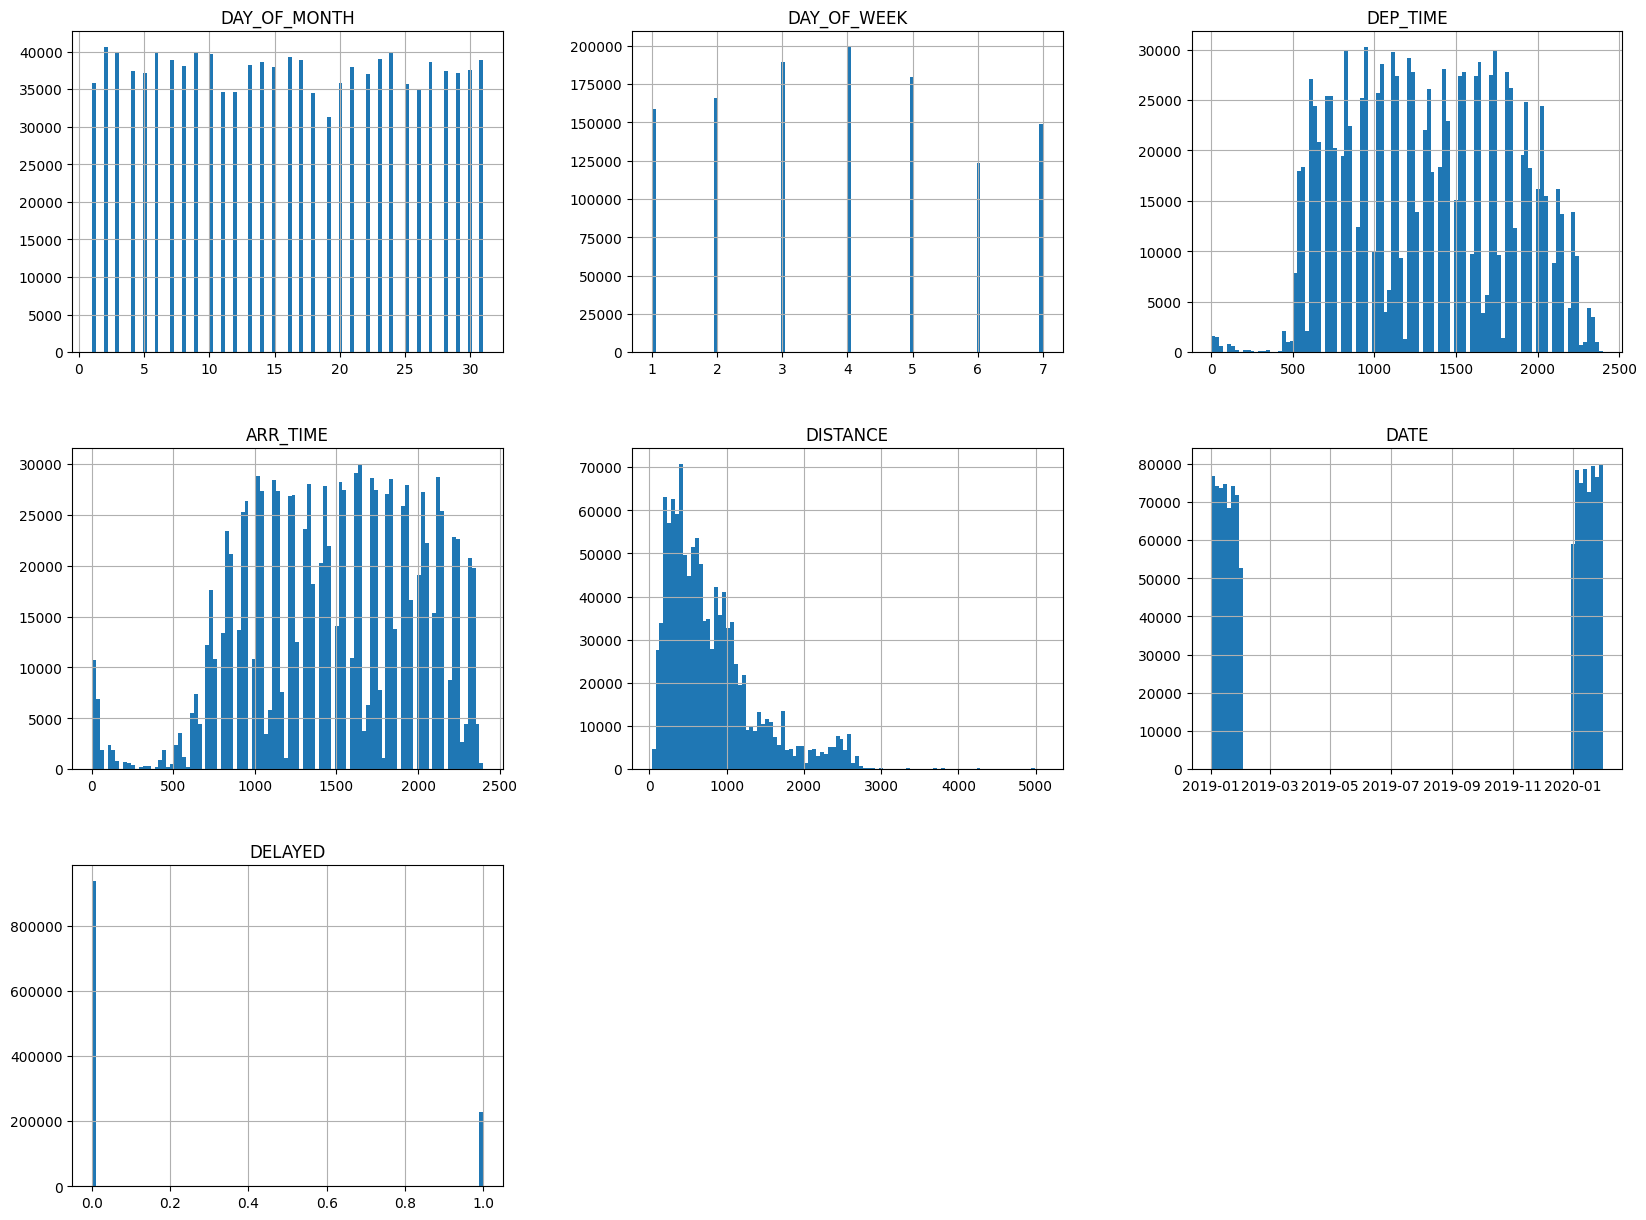

In [63]:
new_data.hist(bins=100,figsize=(20,15))
plt.grid()
plt.show()

Now let's see the delayed flights up close.

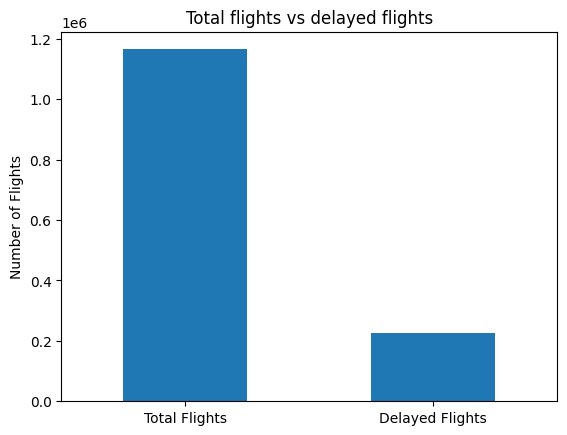

In [64]:
num_delayed = (new_data['DELAYED'] == 1).sum()
counts_delayed = pd.Series({'Total Flights': len(new_data), 'Delayed Flights': num_delayed})

# create a bar plot
ax = counts_delayed.plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.ylabel('Number of Flights')
plt.title('Total flights vs delayed flights' )
plt.show()

Let's see the percentage of delayed flights in the data.

In [65]:
print(f'The data has {round((num_delayed/len(new_data))*100,2)}% of delayed flights.')

The data has 19.53% of delayed flights.


## Now we want to check for outliers.

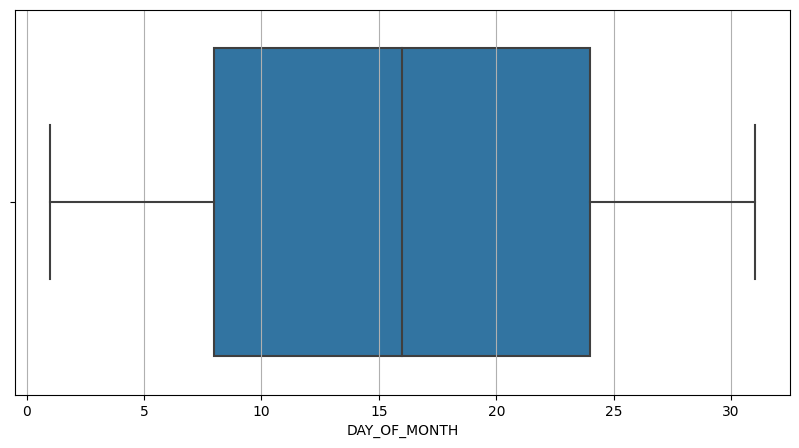

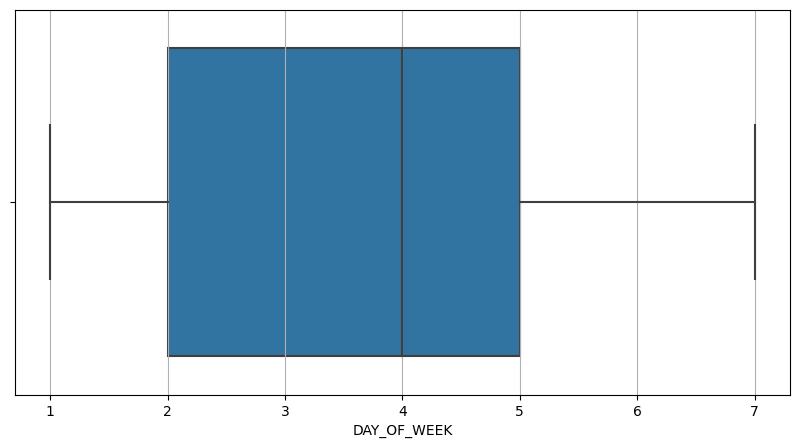

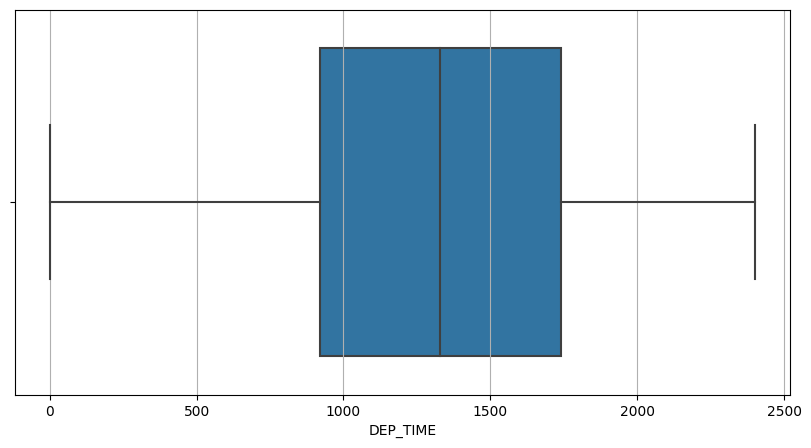

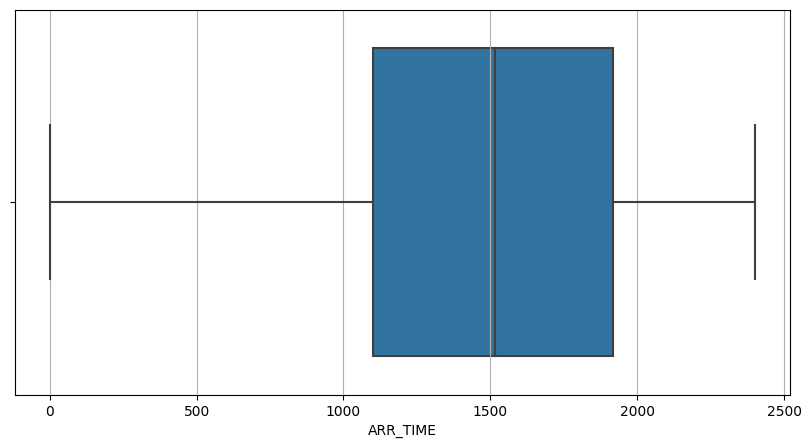

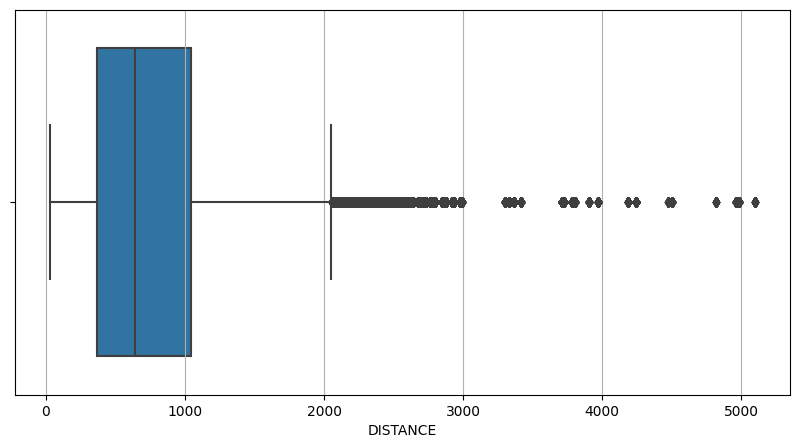

TypeError: Horizontal orientation requires numeric `x` variable.

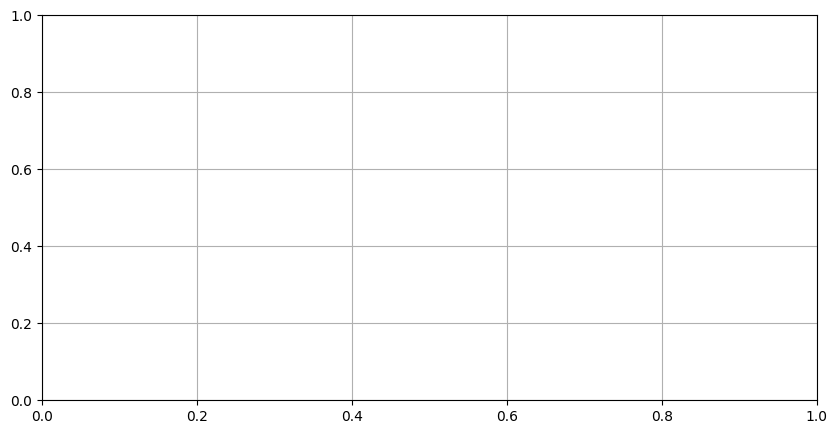

In [66]:
def check_outliers(df):
    for col in numeric_columns:
        fig,ax= plt.subplots(figsize=(10,5))
        plt.grid()
        sns.boxplot(x = df[col])
        plt.show()

check_outliers(new_data)

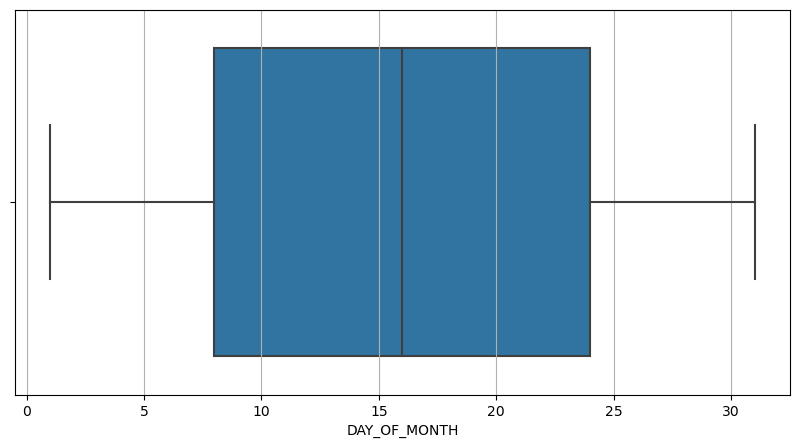

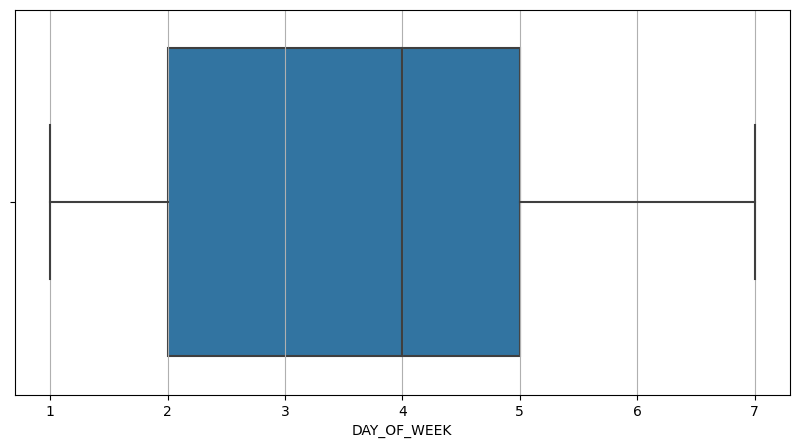

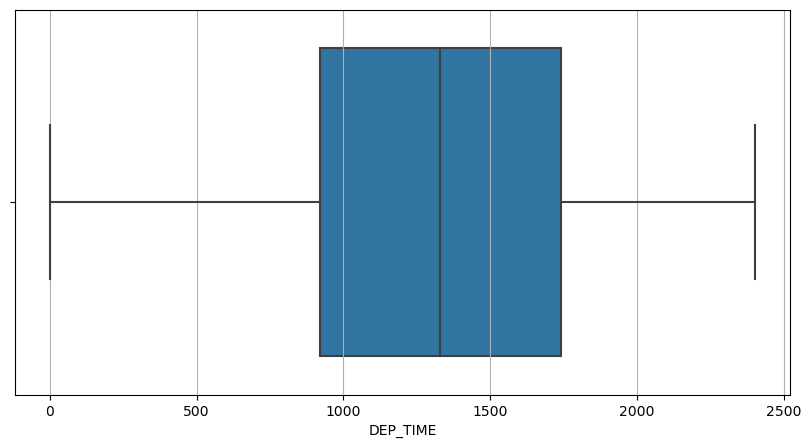

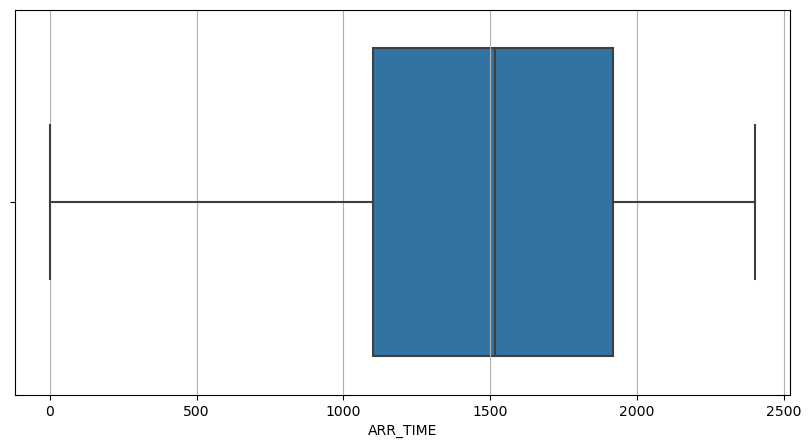

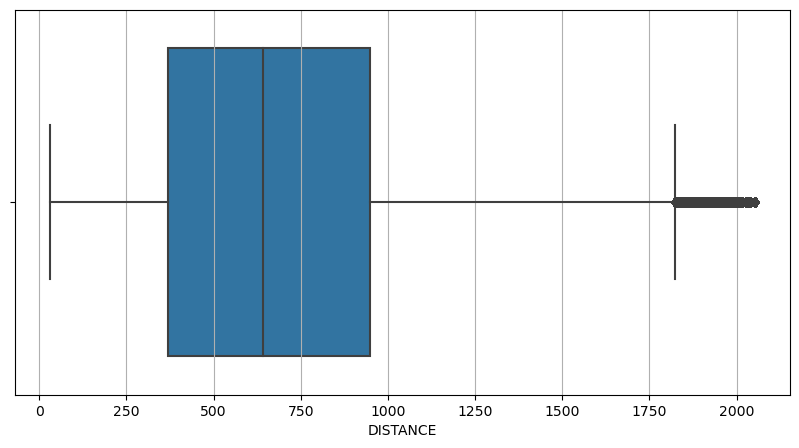

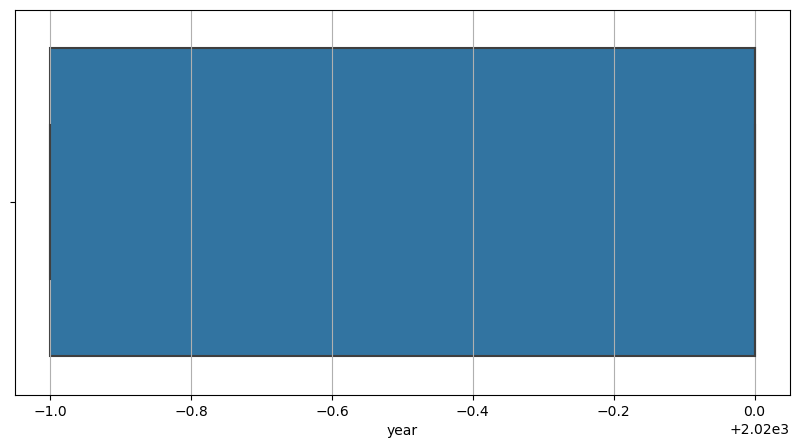

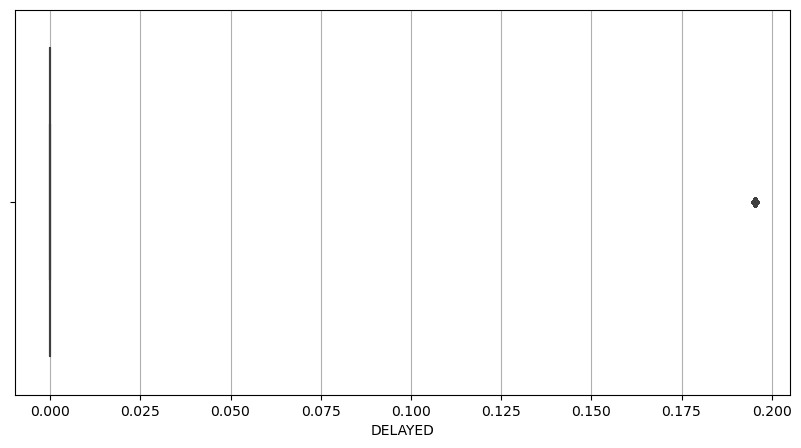

In [346]:
check_outliers(new_data)

### We want a function that replaces the outliers with mean.

In [69]:
def replace_outliers(df):
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        upper_lim = q3 + 1.5 * iqr
        lower_lim = q1 - 1.5 * iqr
        column_mean = df[column].mean()
        outliers_down = (df[column] < lower_lim)
        outliers_up = (df[column] > upper_lim)
        df[column] = np.where((df[column] > upper_lim) | (df[column] < lower_lim) , column_mean, df[column])
        df[column] = pd.DataFrame(df[column],columns=[column])
    return (df)

replace_outliers(new_data)

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DATE,DELAYED
0,1.0,2.0,Endeavor Air,9E,GNV,ATL,601.0,0600-0659,722.0,300.0,1546300800000000000,0.000000
1,1.0,2.0,Endeavor Air,9E,MSP,CVG,1359.0,1400-1459,1633.0,596.0,1546300800000000000,0.000000
2,1.0,2.0,Endeavor Air,9E,DTW,CVG,1215.0,1200-1259,1329.0,229.0,1546300800000000000,0.000000
3,1.0,2.0,Endeavor Air,9E,TLH,ATL,1521.0,1500-1559,1625.0,223.0,1546300800000000000,0.000000
4,1.0,2.0,Endeavor Air,9E,ATL,FSM,1847.0,1900-1959,1940.0,579.0,1546300800000000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31.0,5.0,Endeavor Air,9E,TYS,DTW,1002.0,0700-0759,1128.0,443.0,1580428800000000000,0.195253
607342,31.0,5.0,Endeavor Air,9E,DTW,JFK,1747.0,1700-1759,1933.0,509.0,1580428800000000000,0.000000
607343,31.0,5.0,Endeavor Air,9E,GSP,LGA,554.0,0600-0659,752.0,610.0,1580428800000000000,0.000000
607344,31.0,5.0,Endeavor Air,9E,ATL,XNA,1714.0,1700-1759,1811.0,589.0,1580428800000000000,0.000000


### Now let's see the correlation heatmap.

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_99278/1028391079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(),annot=True,cmap="crest")


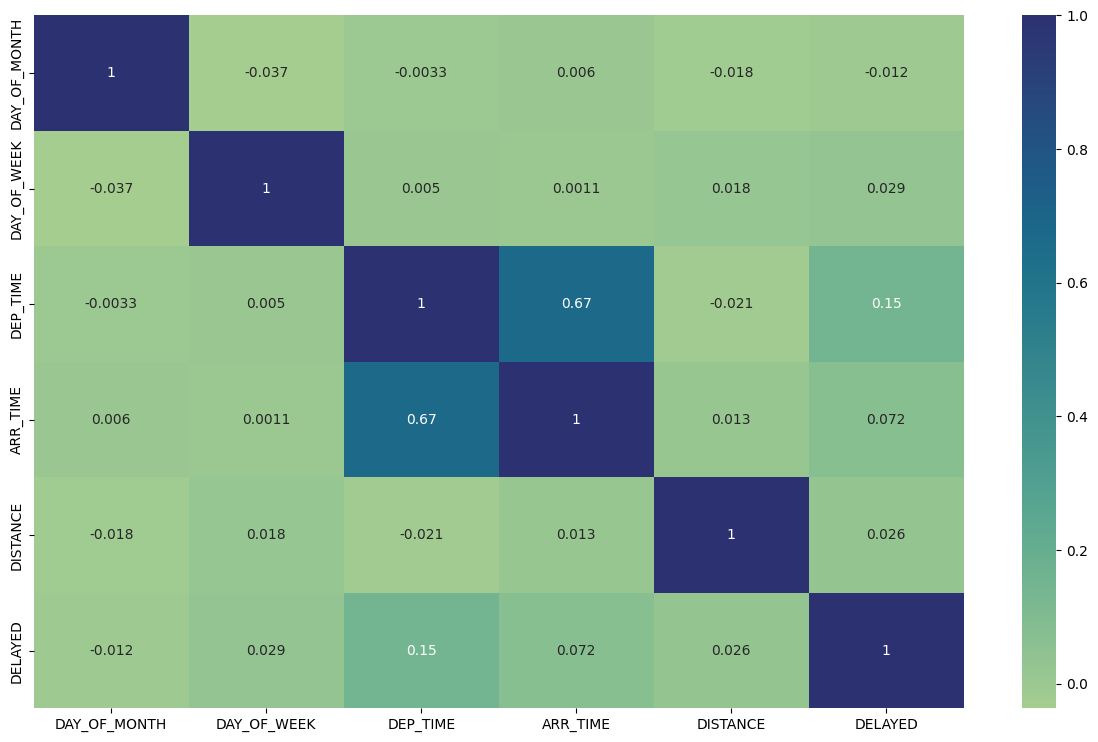

In [67]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(new_data.corr(),annot=True,cmap="crest")
plt.show()

As we can see, the variables don't have much correlation except for arrival time and departure time which makes sence.

We create a function to encode features.

In [349]:
def encode_categories(features):
    lb_make = LabelEncoder()
    for i in range(len(features)):
        new_data[features[i]] = lb_make.fit_transform(new_data[features[i]])

In [350]:
encode_categories(['OP_UNIQUE_CARRIER' , 'ORIGIN' , 'DEST' , 'DEP_TIME_BLK'])

Let's see the information of our data after encoding.

In [351]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165229 entries, 0 to 607345
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1165229 non-null  float64
 1   DAY_OF_WEEK        1165229 non-null  float64
 2   OP_UNIQUE_CARRIER  1165229 non-null  int64  
 3   ORIGIN             1165229 non-null  int64  
 4   DEST               1165229 non-null  int64  
 5   DEP_TIME           1165229 non-null  float64
 6   DEP_TIME_BLK       1165229 non-null  int64  
 7   ARR_TIME           1165229 non-null  float64
 8   DISTANCE           1165229 non-null  float64
 9   year               1165229 non-null  float64
 10  DELAYED            1165229 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 106.7 MB


We can now see the full correlation heat map.

/var/folders/5f/06bzwqjd1kl3lkb5zlxrzcp00000gn/T/ipykernel_99278/1028391079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(),annot=True,cmap="crest")


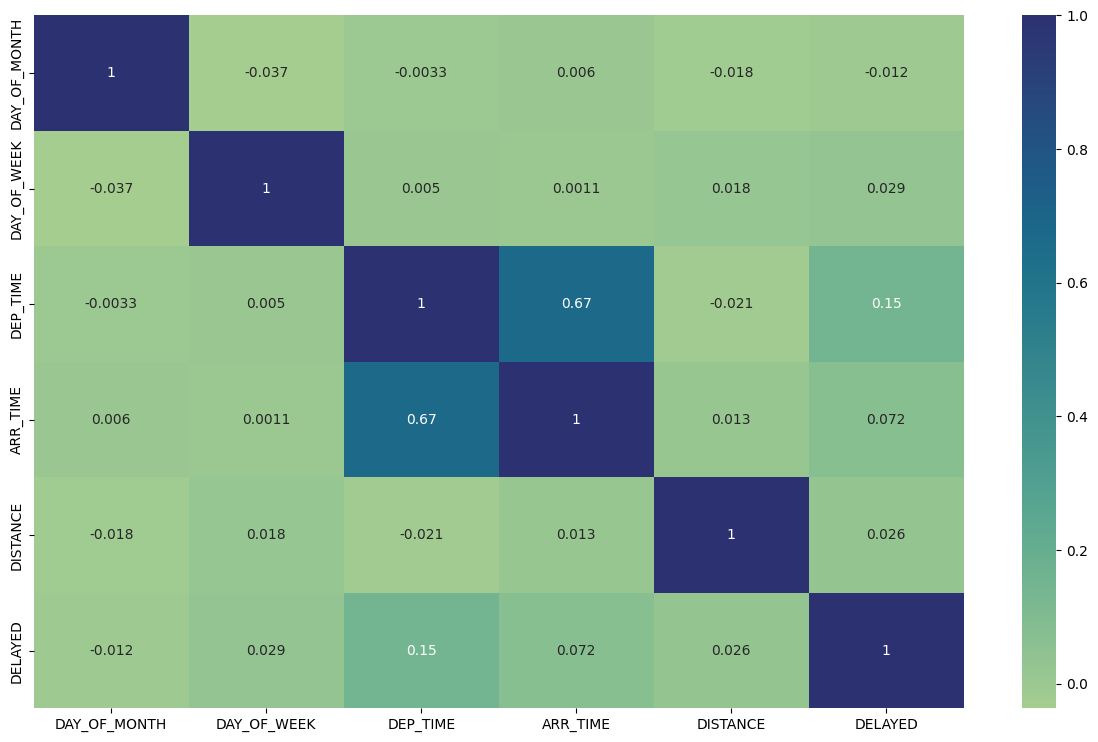

In [68]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(new_data.corr(),annot=True,cmap="crest")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------